In [1]:
import keras
from keras import models
from keras import layers
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

C:\Anaconda2\envs\idp\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
keras.__version__

'2.1.5'

## 第一次测试

In [3]:
raw_data = pd.read_csv("process_oil_plus.csv", encoding = "utf-8")
train_target = raw_data.loc[:, ["正态运价（元/吨）"]].values
train_data = raw_data.drop(["正态运价（元/吨）"], axis = 1).values

## 盛文杰数据

In [121]:
train_season_data = pd.read_csv("train_features(season).csv")
train_season_data = train_season_data.drop(["Unnamed: 0"], axis = 1)
train_season_data = train_season_data[train_season_data["运价（元/吨）"]<750]
train_holiday_data = pd.read_csv("train_features(holiday).csv")
train_holiday_data = train_holiday_data.drop(["Unnamed: 0"], axis = 1)
train_holiday_data = train_holiday_data[train_holiday_data["运价（元/吨）"]<750]

In [123]:
print(train_holiday_data.shape, train_season_data.shape)

(213245, 45) (213245, 48)


In [126]:
print(train_season_data.columns)
# train_season_data

train_season_y = train_season_data.loc[:, ["运价（元/吨）"]].values
train_season_x = train_season_data.drop(["运价（元/吨）"], axis = 1).values


# train_holiday_data
train_holiday_y = train_holiday_data.loc[:, ["运价（元/吨）"]].values
train_holiday_x = train_holiday_data.drop(["运价（元/吨）"], axis = 1).values

# all_
train_season_x_df = train_season_data.drop(["运价（元/吨）"], axis = 1)
holiday = train_holiday_data.loc[:, ["节日"]]
all_ = pd.concat([train_season_x_df, holiday], axis = 1).values
# print(train_season_x.columns)
# print(train_season_y.columns)

# train_y
# np.sqrt(test.values+0.4176)
train_y = np.sqrt(train_season_y+0.4176)

Index(['订单类型', '交易类型', '运价（元/吨）', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5',
       '车型__6', '车型__7', '车型__8', '车型__9', '车型__10', '车型__11', '车型__12',
       '车型__13', '车型__14', '车型__15', '车型__16', '车型__17', '车型__19', '春', '夏',
       '秋', '冬', '品类1', '品类2', '品类3', '品类4', 'start_district__1',
       'start_district__2', 'start_district__3', 'start_district__4',
       'start_district__5', 'start_district__6', 'start_district__7',
       'desti_district__1', 'desti_district__2', 'desti_district__3',
       'desti_district__4', 'desti_district__5', 'desti_district__6',
       'desti_district__7', '标准化油价', '标准化货值（吨/元）', '标准化运距', '标准化车长',
       '标准化平均温度'],
      dtype='object')


In [151]:
print(train_season_x.shape, all_.shape)

(213245, 47) (213245, 48)


In [125]:
train_holiday_data["运价（元/吨）"].describe(percentiles = [.25, .5, .75, .90, .99])

count    213245.000000
mean        140.127239
std          92.012018
min           0.000000
25%          74.000000
50%         111.000000
75%         191.000000
90%         264.000000
99%         462.000000
max         742.000000
Name: 运价（元/吨）, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017753795710>]],
      dtype=object)

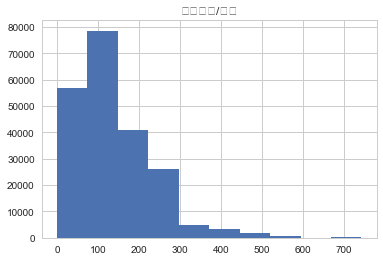

In [84]:
test = train_holiday_data[train_holiday_data["运价（元/吨）"]<750].loc[:, ["运价（元/吨）"]]
test.hist()

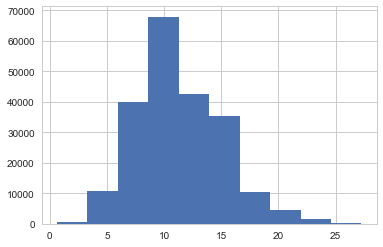

In [120]:
test_np = np.sqrt(test.values+0.4176)
plt.hist(test_np)
plt.show()

In [57]:
len(test)

213403

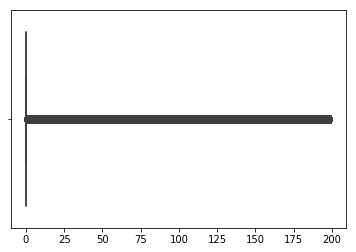

In [69]:
sns.boxplot(x = test)

In [19]:
print(train_season_x.shape, train_season_y.shape)
print(all_.shape)
# print(all_.columns)

(213645, 47) (213645, 1)
(213645, 48)
Index(['订单类型', '交易类型', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5', '车型__6',
       '车型__7', '车型__8', '车型__9', '车型__10', '车型__11', '车型__12', '车型__13',
       '车型__14', '车型__15', '车型__16', '车型__17', '车型__19', '春', '夏', '秋', '冬',
       '品类1', '品类2', '品类3', '品类4', 'start_district__1', 'start_district__2',
       'start_district__3', 'start_district__4', 'start_district__5',
       'start_district__6', 'start_district__7', 'desti_district__1',
       'desti_district__2', 'desti_district__3', 'desti_district__4',
       'desti_district__5', 'desti_district__6', 'desti_district__7', '标准化油价',
       '标准化货值（吨/元）', '标准化运距', '标准化车长', '标准化平均温度', '节日'],
      dtype='object')


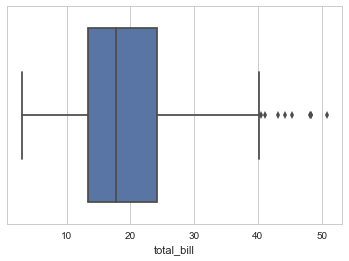

In [70]:

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [71]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [52]:
def build_model(train_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(4, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss  = 'mse', metrics = ['mae'])
    return model


In [217]:
# all_加节日, 对单价取对数

In [220]:
model = build_model(all_)
num_epochs = 10
history = model.fit(all_, train_y, epochs = num_epochs, 
                    batch_size = 100, verbose = 0)

In [213]:
history.history

{'loss': [4.753602479635592,
  1.7691884515249099,
  1.640984710141803,
  1.567765909008925,
  1.5124104336089648,
  1.465449703155071,
  1.4298410605410456,
  1.400277127774956,
  1.3678374456356983,
  1.3428496653168458],
 'mean_absolute_error': [1.3116662408051176,
  0.8753713321111672,
  0.8319294587294436,
  0.8028029033778776,
  0.7829140616501925,
  0.7656416301207514,
  0.7517901819703582,
  0.7396392668366039,
  0.7263282898897951,
  0.71640896720454]}

# test 

In [ ]:
# 交叉验证

In [150]:
all_.shape

(213245, 48)

In [201]:
k = 5
num_val_samples = len(all_)//k
num_epochs = 20
all_score = []
for i in range(k):
    print('processing fold %d'%i)
    val_data = all_[i*num_val_samples:(i+1)*num_val_samples]
    val_target = train_y[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([all_[:i*num_val_samples],
                                         all_[(i+1)*num_val_samples:]], axis = 0)
    partial_train_target = np.concatenate([train_y[:i*num_val_samples],
                                       train_y[(i+1)*num_val_samples:]], axis = 0)
    model = build_model(partial_train_data)
    history = model.fit(partial_train_data, partial_train_target, epochs = num_epochs, 
                        batch_size = 100, verbose = 0, validation_data = (val_data, val_target))
    # val_mse, val_mae = model.evaluate(val_data, val_target, verbose = 0)
    all_score.append(history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


In [154]:
all_score

[1.4338088966723515,
 1.2991664840596824,
 0.9523283781240899,
 0.885901187849189,
 1.1040954160736147]

In [203]:
all_score[1].history["val_mean_absolute_error"]

[0.9728927162932428,
 1.0041189786962934,
 0.9581302132354163,
 1.0160093874025045,
 1.0542336806618944,
 1.160794156233969,
 0.898166267615376,
 0.9490604991300597,
 0.9446148760346875,
 0.9846100022053282,
 1.0208042084663431,
 1.0468742447082886,
 1.0035526925098848,
 0.9773472728613306,
 0.9902281462258757,
 1.0059350612110491,
 1.1053144064046632,
 1.001099405276761,
 1.093643065433759,
 1.0020838938738197]

In [33]:
history.history

{'loss': [26124.604508275846,
  22769.315655038627,
  22660.680239791815,
  22599.661189295268,
  22556.944993327084,
  22535.554177118163,
  22503.98766465908,
  22483.476323393144,
  22475.741347647738,
  22464.406104540663,
  22458.173326992215,
  22450.254066557813,
  22422.38799046431,
  22415.306465198028,
  22397.845746604817,
  22391.520244983796,
  22376.59951750444,
  22370.098492669043,
  22356.170115641875,
  22348.895058448677,
  22354.449720207038,
  22350.955852746825,
  22352.843813186362,
  22355.762521448938,
  22354.720554951655,
  22352.1627546544,
  22353.378953592277,
  22344.847856185166,
  22350.614624794074,
  22351.58510597688,
  22342.884349804874,
  22344.72699876088,
  22348.909807797238,
  22342.279051981594,
  22333.71332680589,
  22335.88121651401,
  22340.47977211873,
  22346.55712637794,
  22362.91530361103,
  22358.513635020216,
  22358.636129651968,
  22367.232640031154,
  22362.957787716547,
  22362.155157253725,
  22362.05936537356,
  22358.5581696

### 64, 64, 1, num-epochs=20

In [29]:
history.history

{'loss': [25848.13360272165,
  22763.346145558105,
  22633.424154534314,
  22564.883577228557,
  22522.77829339241,
  22493.926685302093,
  22468.87185094647,
  22444.74472184813,
  22419.51521458932,
  22398.65621224102,
  22389.79631353913,
  22369.465520124777,
  22362.22535709959,
  22350.196859443884,
  22332.613342749395,
  22327.259354467253,
  22308.823204604934,
  22314.674986263126,
  22314.882433066137,
  22312.074979316127],
 'mean_absolute_error': [46.07609447567721,
  25.787444628717054,
  24.267910757111466,
  23.41135089709731,
  22.89540506917456,
  22.676173112096084,
  22.271798857369493,
  22.064259117794432,
  21.918423345693864,
  21.799577039064097,
  21.569880687009498,
  21.43662340280735,
  21.285464547580972,
  21.118839847516757,
  21.113692537108786,
  21.02589671959797,
  21.100762379367826,
  20.991867470075604,
  21.113699900637783,
  21.08546084547928]}

In [13]:
k = 5
num_val_samples = len(train_data)//k
num_epochs = 100
all_score = []
for i in range(k):
    print('processing fold %d'%i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_target = train_target[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_target = np.concatenate([train_target[:i*num_val_samples],
                                       train_target[(i+1)*num_val_samples:]], axis = 0)
    model = build_model()
    model.fit(partial_train_data, partial_train_target, epochs = num_epochs, batch_size = 10, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose = 0)
    all_score.append(val_mae) 

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


In [14]:
all_score

[0.6438031345524468,
 0.5448012072077859,
 0.5238460874635622,
 0.6084701158393016,
 0.44151063906117183]

In [6]:
model = build_model()
history = model.fit(train_data, train_target, epochs = 50, batch_size = 10, verbose = 0)

In [8]:
history.history

{'loss': [63098.657802098525,
  2.1065371998038924,
  0.8905284339465234,
  0.7242028133568899,
  0.7332425654551938,
  1.071866282644482,
  0.8882544363187745,
  0.6522558069898033,
  0.8711082142292201,
  1.4596380901261488,
  0.7127252072171704,
  0.6545015619741914,
  0.7268087293456317,
  0.5037385312143629,
  0.487205401862275,
  1.0640795635423859,
  0.4871087334083891,
  0.4868769582290107,
  0.55388293759694,
  0.4871151790682998,
  0.48741801642264326,
  0.4872947791207409,
  0.5307368663653239,
  1.4454514481331011,
  0.7177527544149337,
  0.7017612387095356,
  0.7727819172590218,
  0.48696056947272476,
  0.680339786532714,
  0.7803457048201005,
  0.4872076511470726,
  0.4872217071610556,
  0.48720627916183323,
  0.48731147122631535,
  0.4872940364902031,
  0.48747632806767766,
  0.4874679065046484,
  0.4874786863279532,
  0.4873925986685028,
  0.4874293163186612,
  0.48739869174454065,
  0.48752151717669856,
  0.4873558085468236,
  0.4873903144553032,
  0.48739986820295794,

In [9]:
model.save("my_model.h5")

## 终极版

In [16]:
base_dir = "./feature_pro"
train_holiday_data = pd.read_csv("./feature_pro/train_features(holiday).csv")
train_season_data = pd.read_csv(base_dir+"/train_features(season).csv")
test_season_data = pd.read_csv(base_dir+"/test_features(season).csv")
test_holiday_data = pd.read_csv(base_dir+"/test_features(holiday).csv")

In [19]:
train_season_data = train_season_data.drop(["Unnamed: 0"], axis = 1)
train_season_data = train_season_data[train_season_data["运价（元/吨）"]<750]

train_holiday_data = train_holiday_data.drop(["Unnamed: 0"], axis = 1)
train_holiday_data = train_holiday_data[train_holiday_data["运价（元/吨）"]<750]

## 训练集

In [97]:
# train_season_data
train_season_y = train_season_data.loc[:, ["运价（元/吨）"]].values
train_season_x = train_season_data.drop(["运价（元/吨）"], axis = 1).values

# train_holiday_data
train_holiday_y = train_holiday_data.loc[:, ["运价（元/吨）"]].values
train_holiday_x = train_holiday_data.drop(["运价（元/吨）"], axis = 1).values

# all_
train_season_x_df = train_season_data.drop(["运价（元/吨）"], axis = 1)
holiday = train_holiday_data.loc[:, ["节日"]]
train_all_df = pd.concat([train_season_x_df, holiday], axis = 1)
train_all_np = train_all_df.values
# print(train_season_x.columns)
# print(train_season_y.columns)

# train_y
# np.sqrt(test.values+0.4176)
train_y = np.sqrt(train_season_y+0.4176)

In [62]:
print(train_holiday_data.shape, 
      train_season_data.shape, 
      test_season_data.shape, 
      test_holiday_data.shape)


print("-------------------------")
print(train_all_.shape, 
     train_holiday_x.shape,
     train_season_x.shape,
     train_holiday_y.shape,
     train_season_y.shape)



(213245, 45) (213245, 48) (73660, 38) (73660, 38)
-------------------------
(213245, 48) (213245, 44) (213245, 47) (213245, 1) (213245, 1)


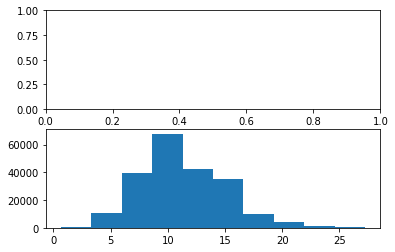

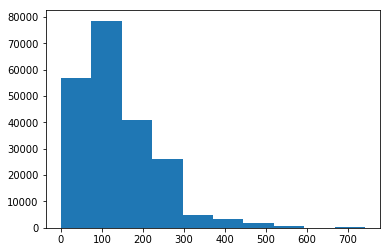

In [33]:
plt.subplots(2,1)

plt.hist(train_y)
plt.show()
plt.hist(train_season_y)
plt.show()

In [27]:
print(train_holiday_data.columns, train_season_data.columns)

Index(['订单类型', '交易类型', '运价（元/吨）', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5',
       '车型__6', '车型__7', '车型__8', '车型__9', '车型__10', '车型__11', '车型__12',
       '车型__13', '车型__14', '车型__15', '车型__16', '车型__17', '车型__19', '节日', '品类1',
       '品类2', '品类3', '品类4', 'start_district__1', 'start_district__2',
       'start_district__3', 'start_district__4', 'start_district__5',
       'start_district__6', 'start_district__7', 'desti_district__1',
       'desti_district__2', 'desti_district__3', 'desti_district__4',
       'desti_district__5', 'desti_district__6', 'desti_district__7', '标准化油价',
       '标准化货值（吨/元）', '标准化运距', '标准化车长', '标准化平均温度'],
      dtype='object') Index(['订单类型', '交易类型', '运价（元/吨）', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5',
       '车型__6', '车型__7', '车型__8', '车型__9', '车型__10', '车型__11', '车型__12',
       '车型__13', '车型__14', '车型__15', '车型__16', '车型__17', '车型__19', '春', '夏',
       '秋', '冬', '品类1', '品类2', '品类3', '品类4', 'start_district__1',
       'start_district__2', 'start_distri

## 测试集

In [35]:
test_season_data.head()

,Unnamed: 0,订单类型,交易类型,车型__0,车型__2,车型__3,车型__4,车型__5,车型__6,车型__7,...,desti_district__3,desti_district__4,desti_district__5,desti_district__6,desti_district__7,标准化油价,标准化货值（吨/元）,标准化运距,标准化车长,标准化平均温度
0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0.281690,0.000133,0.178460,0.642857,0.371429
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0.253521,0.000133,0.192429,0.642857,0.571429
2,2,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0.253521,0.000133,0.192203,0.642857,0.571429
3,3,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.295775,0.000143,0.096210,0.642857,0.514286
4,4,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0.380282,0.041667,0.117994,0.642857,0.571429


In [36]:
test_season_data = test_season_data.drop(["Unnamed: 0"], axis = 1)

test_holiday_data = test_holiday_data.drop(["Unnamed: 0"], axis = 1)

In [105]:
# all_
holiday_ = test_holiday_data.loc[:, ["节日"]]
test_all_df = pd.concat([test_season_data, holiday_], axis = 1)

In [106]:
print(test_all_df.shape, train_all_df.shape)

(73660, 39) (213245, 48)


In [96]:
test_all_df.columns

Index(['订单类型', '交易类型', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5', '车型__6',
       '车型__7', '车型__11', '车型__12', '车型__13', '车型__15', '车型__19', '春', '品类1',
       '品类2', '品类3', '品类4', 'start_district__1', 'start_district__2',
       'start_district__3', 'start_district__4', 'start_district__5',
       'start_district__6', 'start_district__7', 'desti_district__1',
       'desti_district__2', 'desti_district__3', 'desti_district__4',
       'desti_district__5', 'desti_district__6', 'desti_district__7', '标准化油价',
       '标准化货值（吨/元）', '标准化运距', '标准化车长', '标准化平均温度', '节日'],
      dtype='object')

In [107]:
im_list = [0]*73660
im_df = pd.DataFrame({'车型__8':im_list, 
                      '车型__9':im_list, '车型__10':im_list,
                     '车型__14':im_list,'车型__16':im_list, 
                      '车型__17':im_list,'夏':im_list, 
                      '秋':im_list, '冬':im_list,})
test_all_df = pd.concat([test_all_df,im_df], axis = 1)
test_all_df = test_all_df[['订单类型', '交易类型', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5', '车型__6',
       '车型__7', '车型__8', '车型__9', '车型__10', '车型__11', '车型__12', '车型__13',
       '车型__14', '车型__15', '车型__16', '车型__17', '车型__19', '春', '夏', '秋', '冬',
       '品类1', '品类2', '品类3', '品类4', 'start_district__1', 'start_district__2',
       'start_district__3', 'start_district__4', 'start_district__5',
       'start_district__6', 'start_district__7', 'desti_district__1',
       'desti_district__2', 'desti_district__3', 'desti_district__4',
       'desti_district__5', 'desti_district__6', 'desti_district__7', '标准化油价',
       '标准化货值（吨/元）', '标准化运距', '标准化车长', '标准化平均温度', '节日']]
print(test_all_df.columns)
print(test_all_df.head())

Index(['订单类型', '交易类型', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5', '车型__6',
       '车型__7', '车型__8', '车型__9', '车型__10', '车型__11', '车型__12', '车型__13',
       '车型__14', '车型__15', '车型__16', '车型__17', '车型__19', '春', '夏', '秋', '冬',
       '品类1', '品类2', '品类3', '品类4', 'start_district__1', 'start_district__2',
       'start_district__3', 'start_district__4', 'start_district__5',
       'start_district__6', 'start_district__7', 'desti_district__1',
       'desti_district__2', 'desti_district__3', 'desti_district__4',
       'desti_district__5', 'desti_district__6', 'desti_district__7', '标准化油价',
       '标准化货值（吨/元）', '标准化运距', '标准化车长', '标准化平均温度', '节日'],
      dtype='object')
   订单类型  交易类型  车型__0  车型__2  车型__3  车型__4  车型__5  车型__6  车型__7  车型__8 ...  \
0     0     1      0      0      0      1      0      0      0      0 ...   
1     0     1      0      0      0      1      0      0      0      0 ...   
2     0     1      0      0      0      1      0      0      0      0 ...   
3     0     0      

In [99]:
train_all_df.columns

Index(['订单类型', '交易类型', '车型__0', '车型__2', '车型__3', '车型__4', '车型__5', '车型__6',
       '车型__7', '车型__8', '车型__9', '车型__10', '车型__11', '车型__12', '车型__13',
       '车型__14', '车型__15', '车型__16', '车型__17', '车型__19', '春', '夏', '秋', '冬',
       '品类1', '品类2', '品类3', '品类4', 'start_district__1', 'start_district__2',
       'start_district__3', 'start_district__4', 'start_district__5',
       'start_district__6', 'start_district__7', 'desti_district__1',
       'desti_district__2', 'desti_district__3', 'desti_district__4',
       'desti_district__5', 'desti_district__6', 'desti_district__7', '标准化油价',
       '标准化货值（吨/元）', '标准化运距', '标准化车长', '标准化平均温度', '节日'],
      dtype='object')

In [108]:
test_all_df.columns==train_all_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [51]:
print(train_season_data.shape, test_season_data.shape, "\n"
      "---------------------------------------------", "\n",
      train_holiday_data.shape, test_holiday_data.shape)

(213245, 48) (73660, 38) 
--------------------------------------------- 
 (213245, 45) (73660, 38)


In [53]:
def build_model(train_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(4, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss  = 'mse', metrics = ['mae'])
    return model

In [55]:
train_season_y==train_holiday_y

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [71]:
model = build_model(train_all_)
history = model.fit(train_all_, train_season_y, epochs = 200, 
                        batch_size = 100, verbose = 0)

In [72]:
history.history

{'loss': [2824.213207384853,
  1143.583284596608,
  1055.2958094657617,
  1019.2491169887712,
  993.076752322928,
  973.6195258123771,
  954.3546211571651,
  939.9035106479064,
  928.032244801921,
  915.7872002357956,
  905.7496037229977,
  898.8614482304066,
  886.2740881500212,
  879.4764848683302,
  872.3967054791433,
  864.6298376554431,
  859.1150618825989,
  850.8786004788794,
  844.5857346438644,
  840.9266616308596,
  835.1132809229928,
  830.7531782530987,
  825.2714578523488,
  820.0603272742316,
  814.9436188005317,
  811.2127161462264,
  806.1611458720399,
  805.3878844972987,
  798.4420807479389,
  797.2140566399152,
  793.4156982605057,
  788.9531529387286,
  787.2213753424746,
  782.4858686418567,
  779.6230076062207,
  777.4376513227946,
  774.9396638779677,
  770.4666694037008,
  768.921100824949,
  765.1040603060602,
  763.3257285246925,
  758.3939168441198,
  760.681723968206,
  755.5926217161428,
  755.3985687880536,
  753.063184450552,
  750.6072764369052,
  749.70

In [109]:
train_all_data = np.concatenate((train_all_np, train_y),axis = 1)
np.random.shuffle(train_all_data)

In [110]:
par_train_x = train_all_data[:20000][:,:-1]
par_train_y = train_all_data[:20000][:,-1]

In [111]:
val_train_x = train_all_data[20000:][:,:-1]
val_train_y = train_all_data[20000:][:,-1]

In [85]:
val_train_y.shape

(193245,)

In [86]:
val_train_y[:10]

array([117.,  64.,  87.,  14., 143.,  85.,  52.,  53., 105., 200.])

In [112]:
model = build_model(par_train_x)
history = model.fit(par_train_x, par_train_y, epochs = 500, 
                        batch_size = 100, verbose = 0, 
                    validation_data = (val_train_x, val_train_y))

In [113]:
history.history["val_mean_absolute_error"]

[1.4771264347673163,
 1.081476924009115,
 1.207923834344055,
 0.9562732110344524,
 0.9285175480640007,
 0.9021779377049205,
 1.0062837645216016,
 1.0583333812613342,
 1.0476607871415244,
 0.9081213408128549,
 1.314001997546325,
 0.8349982435242035,
 0.9770497936950026,
 0.8760732781295156,
 0.8192474598326182,
 0.8800527324848993,
 1.206931665041224,
 0.7997673470877303,
 1.1146422837350485,
 1.0723968460604938,
 1.0517059513142526,
 0.7615742662482935,
 0.8240515066228303,
 0.7648253706948822,
 1.1380568776958162,
 0.7980621441539075,
 0.9281164275193086,
 0.7594148665708991,
 0.9426921790573136,
 0.9196755076713767,
 0.8982537772286037,
 0.9098992617772639,
 0.9781632022998439,
 0.7362401774575533,
 0.9219430024856621,
 0.8365234117658578,
 0.782584858075154,
 0.7237043852590059,
 0.7879133838099457,
 0.7197186826114318,
 0.7230472914422881,
 0.7526275497666768,
 0.7886760900355504,
 0.7198240482599578,
 0.8411356912581108,
 0.7644742864597512,
 0.7696895999443812,
 0.801787208914278

In [118]:
model = build_model(train_all_np)
model.fit(train_all_np, train_y, epochs = 500, 
                        batch_size = 100, verbose = 0)
res = model.predict(test_all_df.values)

In [120]:
len(res)

73660

In [123]:
# np.sqrt(train_season_y+0.4176)

result = pow(res,2)-0.4176

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                3136      
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_54 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 5         
Total params: 8,409
Trainable params: 8,409
Non-trainable params: 0
_________________________________________________________________


In [125]:
result

array([[206.56104 ],
       [201.67517 ],
       [201.59651 ],
       ...,
       [ 71.23637 ],
       [136.61844 ],
       [ 85.082085]], dtype=float32)

In [133]:
test_ = pd.read_excel("./price/定价系统预测数据.xlsx")


In [134]:
result_df = pd.DataFrame(result, columns = ["运价（元/吨）"])

In [135]:
last_res_df = pd.concat([test_, result_df], axis = 1)

In [136]:
last_res_df.head()

,日期,一级品类,钢材品类,订单类型,交易类型,货值（吨/元）,起运地经度,起运地纬度,目的地经度,目的地纬度,运距,车型,车长,运价（元/吨）
0,2018-01-01,4,358,0,1,800.0,119.462228,35.425475,112.899137,35.617221,711.03,4,13.0,206.561035
1,2018-01-01,4,358,0,1,800.0,119.338788,34.760249,112.899137,35.617221,766.61,4,13.0,201.675171
2,2018-01-01,4,358,0,1,800.0,119.338788,34.760249,112.899137,35.617221,765.71,4,13.0,201.596512
3,2018-01-01,4,358,0,0,860.0,117.710496,39.003660,114.199134,38.247144,383.79,4,13.0,57.781330
4,2018-01-01,1,37,0,1,250000.0,112.899137,35.617221,108.940174,34.341568,470.46,5,13.0,113.713425


In [141]:
last_res_df.to_csv("result.csv", index= False)

In [140]:
help(pd.to_csv())

AttributeError: module 'pandas' has no attribute 'to_csv'